In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy import stats

%matplotlib inline

In [3]:
weather_data = pd.read_csv('Petersburg Station Weather Data.csv')
weather_data

,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,PRECIPITATION,TEMP-LOW,TEMP-HIGH
0,20100101,-33,145,2,-3.3,14.5
1,20100102,-35,144,4,-3.5,14.4
2,20100103,-36,143,5,-3.6,14.3
3,20100104,-38,142,7,-3.8,14.2
4,20100105,-39,141,9,-3.9,14.1
5,20100106,-41,140,10,-4.1,14.0
6,20100107,-42,140,12,-4.2,14.0
7,20100108,-43,139,13,-4.3,13.9
8,20100109,-44,139,15,-4.4,13.9
9,20100110,-45,139,17,-4.5,13.9


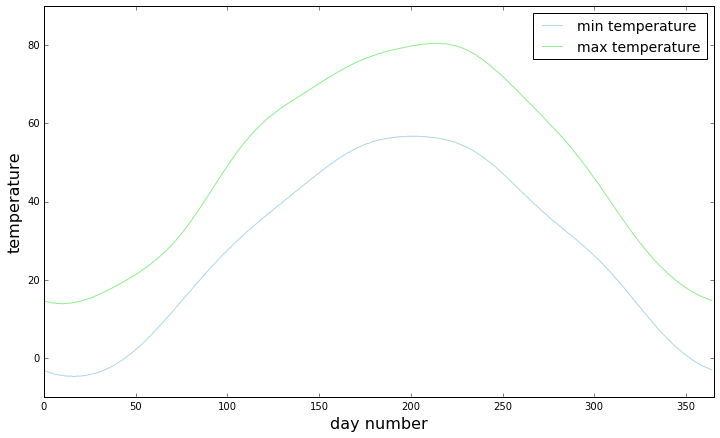

In [4]:
#define the subplots and figure size
f,ax = plt.subplots(figsize=(12,7))

#plot the data with better colors
ax.plot(weather_data['TEMP-LOW'], c = 'lightblue', label='min temperature')
ax.plot(weather_data['TEMP-HIGH'], c = 'lightgreen' , label='max temperature')
#ax.plot(weather_data['PRECIPITATION'], c = 'magenta')


ax.set_xlabel('day number', fontsize=16)
ax.set_ylabel('temperature',fontsize=16)

ax.set_xlim(0, 365)

ax.legend(loc = 'upper right', fontsize = 14)

### Let's find out if the variance in temperature changes across time

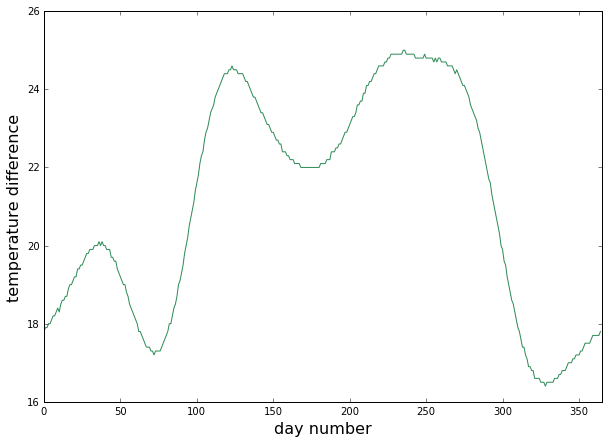

In [5]:
#Plot the differences in low and max
diff_t = weather_data['TEMP-HIGH'] - weather_data['TEMP-LOW']

#Plot it: is it constant?
f,ax = plt.subplots(figsize=(10,7))
ax.plot(diff_t, c = 'seagreen', label='min temperature')

ax.set_xlim(0, 365)

ax.set_xlabel('day number', fontsize=16)
ax.set_ylabel('temperature difference',fontsize=16)


Depending on the seasons, we observe higher ranges of temperature difference

### Does it rain more in high fluctuating temperature seasons?

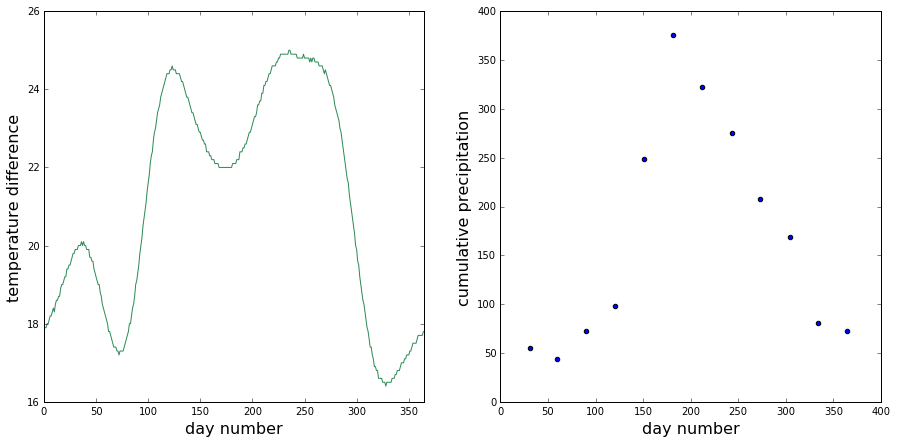

In [6]:
prec = weather_data['PRECIPITATION']

#We need to filter this, since it's cumulative data
prec_curr = 1000
prec_months = []
prec_idx = []
for i in xrange(len(prec)):
    #look at whether your new precipitation is lower than the previous. If it is, you're at a new month
    if i > 0:
        if prec[i] < prec[i-1]:
            prec_months.append(prec[i-1])
            prec_idx.append(i)
    #Save the last point, too. 
    if i == len(prec)-1:
        prec_months.append(prec[i])
        prec_idx.append(i)


#define the subplots and figure size
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#plot the data with better colors
ax1.plot(diff_t, c = 'seagreen', label='min temperature')

ax1.set_xlim(0, 365)

ax1.set_xlabel('day number', fontsize=16)
ax1.set_ylabel('temperature difference',fontsize=16)

ax2.scatter(prec_idx, prec_months)
ax2.set_xlabel('day number', fontsize=16)
ax2.set_ylabel('cumulative precipitation',fontsize=16)




Seems like we indeed see a pattern. 

## The following plot below looks pretty. Plotting it was an accident

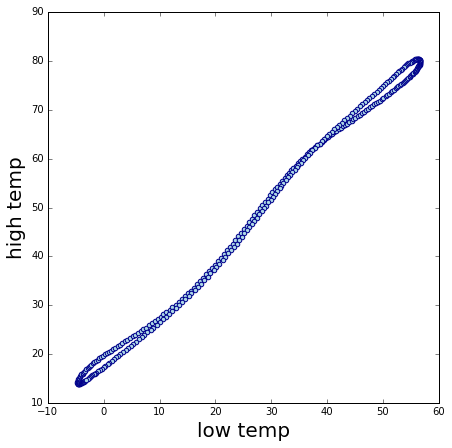

In [7]:
#define the subplots and figure size
f,ax = plt.subplots(figsize=(7,7))

#plot the data with better colors
ax.scatter(weather_data['TEMP-LOW'], weather_data['TEMP-HIGH'], c = 'lightblue', edgecolors='darkblue')
ax.set_xlabel('low temp', fontsize = 20)
ax.set_ylabel('high temp',fontsize = 20)
